## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd

## Read The Datasets

In [2]:
df=pd.read_excel("measurements2.xlsx")
print(df.head())

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


## Check Null Values

<Axes: >

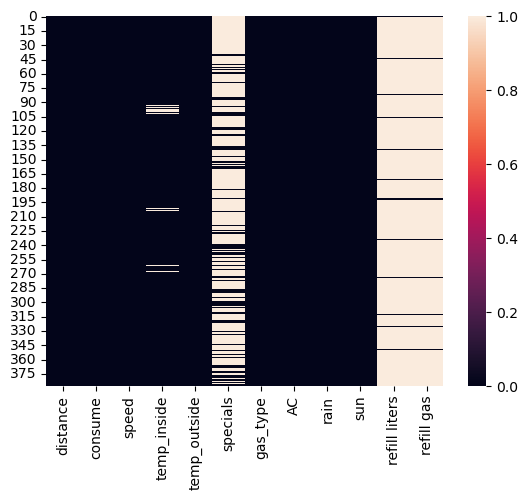

In [3]:
import seaborn as sns
sns.heatmap(df.isnull()) 

In [4]:
df.isnull()# function used to check null values

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,True,False,False,False,False,True,True
384,False,False,False,False,False,False,False,False,False,False,True,True
385,False,False,False,False,False,True,False,False,False,False,True,True
386,False,False,False,False,False,False,False,False,False,False,True,True


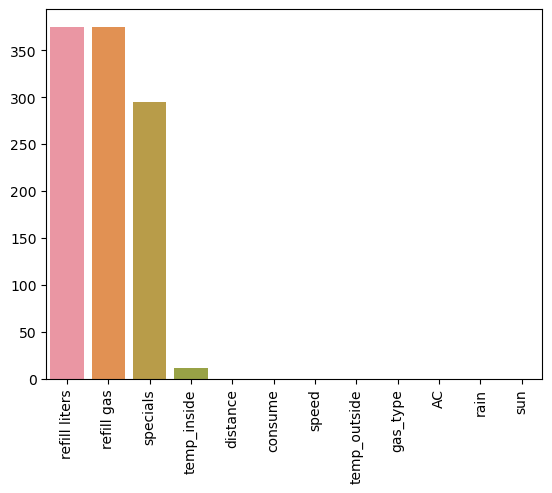

In [5]:
null_values=df.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(x=null_values.index,y=null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
import matplotlib.pyplot as plt
plt.show()# heatmap() and barplot() to visualize null values

## Removing Null Values

<Axes: >

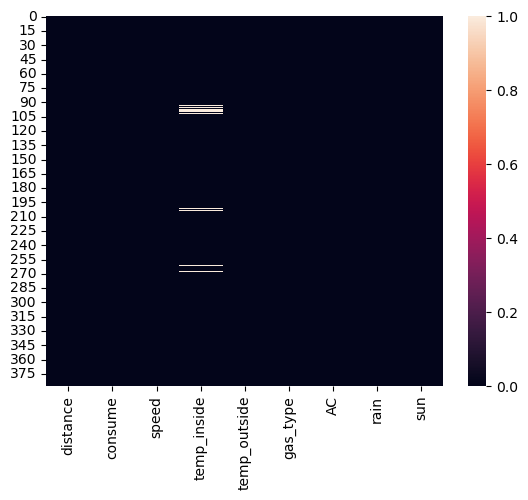

In [6]:
df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull()) #df.drop to drop columns using pandas

## Handling Null Values

In [7]:
temp_inside_mean=np.mean(df['temp_inside'])
print(temp_inside_mean)

21.929521276595743


<Axes: >

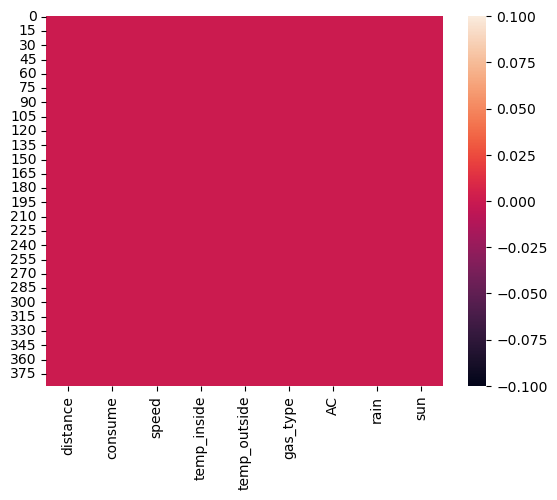

In [8]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)
sns.heatmap(df.isnull()) #Fillna() method from pandas is used to replace null values with their mean

## Seperating Independent And Dependent Variables

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [10]:
x=df.drop(['consume','gas_type'],axis=1)

In [11]:
y=df['consume']

In [12]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [13]:
x=x.values
y=y.values

## Splitting Data Into Train And Test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Applying Linear Regression

In [15]:
l.fit(x_train,y_train)

LinearRegression()

In [16]:
x_train.shape

(271, 7)

In [17]:
y_pred=l.predict(x_test)

In [18]:
print(l.coef_,l.intercept_)

[ 0.00523674 -0.02371772 -0.14711979 -0.03724498  0.41456804  0.61676684
 -0.06407861] 9.389308142257121


In [19]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.7424532609047076
0.6635761182069618
0.8616572757800561


In [20]:
dum1=pd.get_dummies(df['gas_type'])
print(dum1)

     E10  SP98
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
..   ...   ...
383    0     1
384    0     1
385    0     1
386    0     1
387    0     1

[388 rows x 2 columns]


In [21]:
df=pd.concat([df,dum1],axis=1)

In [22]:
df.drop('gas_type',axis=1,inplace=True)

In [23]:
x1=df.drop('consume',axis=1)

In [24]:
y1=df['consume']

In [25]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [26]:
x1=x1.values
y1=y1.values

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [28]:
l.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred_1=l.predict(x_test)
print(y_pred_1)

[4.80398179 5.24631572 5.16373706 5.23299719 4.52776021 5.99062392
 5.73193936 5.23198354 5.8898096  4.94684204 4.0800537  4.78422755
 6.55357901 4.50083061 5.1268724  5.24267179 5.61167026 5.14823973
 5.48324723 5.36437201 4.13422549 5.30350959 4.94565881 5.23290799
 4.88631664 4.79418748 4.55506668 4.28205093 5.10144732 3.90735262
 4.97478302 5.29391251 4.75042548 4.56699402 5.53113778 5.02945576
 4.6453334  4.03415275 5.10287619 6.16080817 4.47545803 5.28255966
 5.37539962 4.41278157 4.69332325 4.39387259 5.10382269 5.1927726
 4.95992397 4.98995489 4.87121094 5.4268889  5.44648531 5.28120341
 4.61905757 4.90286809 6.70123899 5.3534319  4.71689758 4.78621524
 5.50574979 4.9290579  4.55311849 4.81518093 4.36022913 4.75672285
 5.55769604 4.34876836 4.82767226 4.91585314 4.28138845 4.6582407
 5.19170002 4.97280779 5.18528042 4.79819291 5.32165909 5.10687874
 5.38921307 5.15592614 5.26829591 5.45539801 4.47960294 5.3509791
 5.71243061 4.42243076 5.53113325 5.74565111 5.1678087  4.5763415

In [30]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

0.8646934069540179


In [31]:
x_train.shape

(271, 9)

In [32]:
x_train[0]

array([12.3, 62. , 21.5,  6. ,  0. ,  0. ,  0. ,  1. ,  0. ])

In [33]:
import joblib
joblib.dump(l,'model.save')

['model.save']